In [1]:
import os 
os.chdir('..')

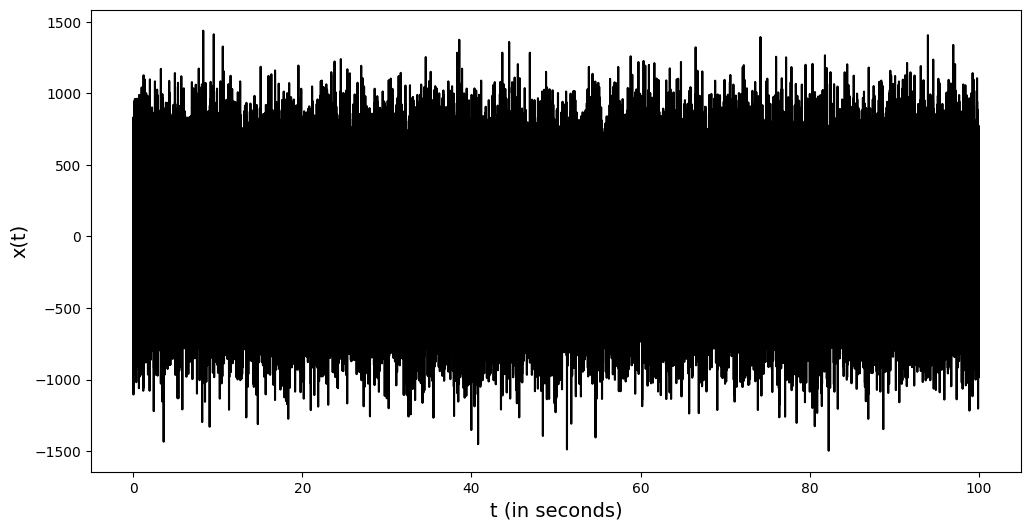

10000
10000
10000


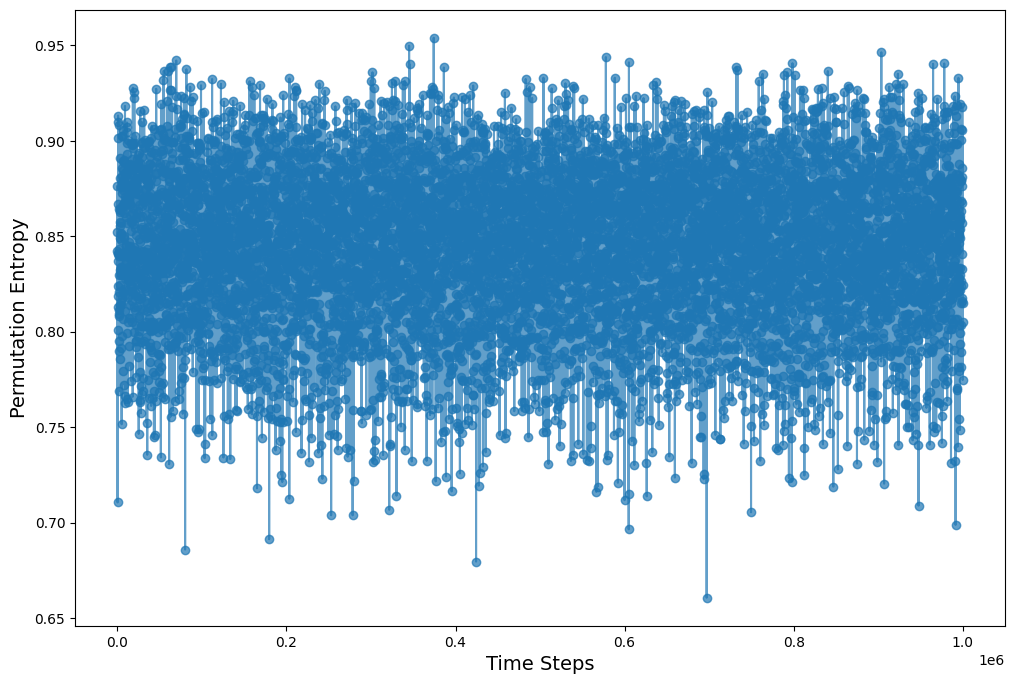

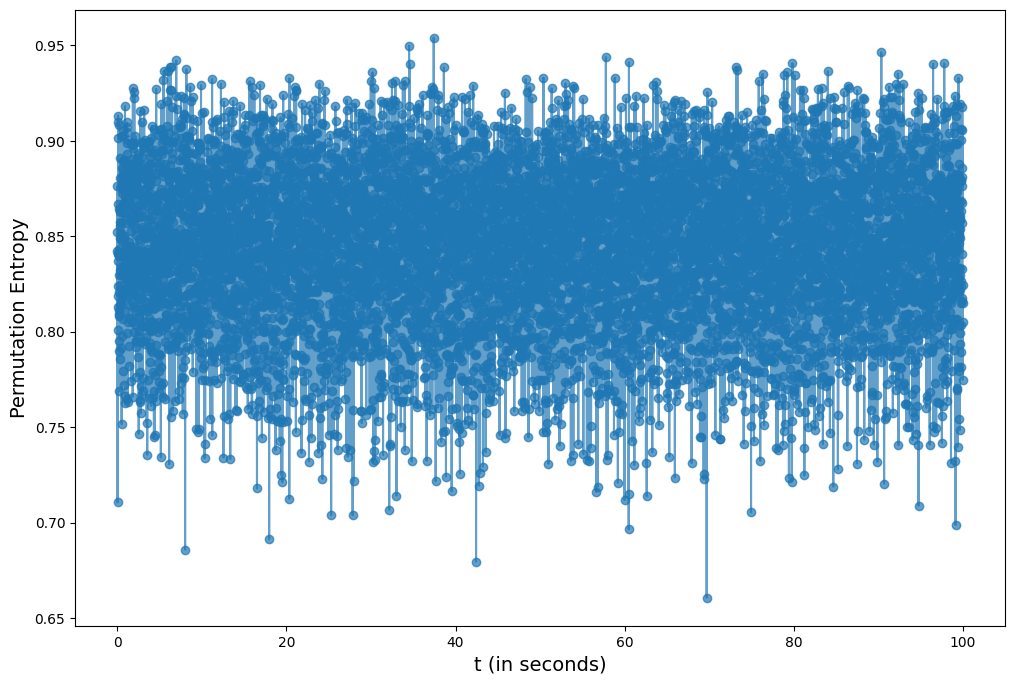

In [2]:
######################################
from ordpy import permutation_entropy  
import numpy as np
import matplotlib.pyplot as plt

### just a sample stochastic model to generate 1D-trajectory ###
gamma = 0.001  
k = 1    
taus = [0.00015]
D = 1000000.0      
dt = 0.0001    
T = 100.0    
N = int(T / dt)  

plt.figure(figsize=(12, 6))
x_time_series = {}
for tau in taus:
    x = np.zeros(N)
    eta = np.zeros(N)
    time = np.linspace(0, T, N)
    x[0] = 0.0
    eta[0] = 0.0
    for i in range(1, N):
        xi = np.random.normal(0, 1)
        eta[i] = eta[i-1] + dt / tau * (-eta[i-1] + np.sqrt(2 * D) * xi)
        x[i] = x[i-1] + dt / gamma * (-k * x[i-1] + eta[i-1])
    x_time_series[tau] = x
    trajectory=x
    plt.plot(time, x, 'black')

plt.xlabel('t (in seconds)',fontsize='14')
plt.ylabel('x(t)',fontsize='14')
plt.show()

##########Calculate Permutation Entropy below #################
dx = 4  
time_window_size = 100  
# i.e., For 100 points in each segment, we calculate one PE value

# Divide the total data into non-overlapping segments
num_segments = len(trajectory) // time_window_size
print(num_segments)

# Function to compute permutation entropy in each segment
def time_window_pe(trajectory, dx, num_segments):
    pe_values = []
    for i in range(num_segments):
        segments = trajectory[i * time_window_size:(i + 1) * time_window_size]
        pe_value = permutation_entropy(segments, dx=dx)  
        pe_values.append(pe_value)
    return pe_values
##########################################################

plt.figure(figsize=(12, 8))
pe_values = time_window_pe(trajectory, dx, num_segments)
print(len(pe_values))
time_steps = range(0, len(trajectory)-1, time_window_size)
plt.plot(time_steps,pe_values, '-o',alpha=0.7)
print(len(time_steps))
plt.xlabel('Time Steps',fontsize='14')
plt.ylabel('Permutation Entropy',fontsize='14')
plt.show()

#################################################
plt.figure(figsize=(12, 8))
time= np.arange(0, 10000)

plt.plot(0.01*time,pe_values, '-o',alpha=0.7)

plt.xlabel('t (in seconds)',fontsize='14')
plt.ylabel('Permutation Entropy',fontsize='14')
plt.show()
#################################################